In [5]:
# Linear regression -> Scikit-Learn

# Data dictionary:
# Configuration Index -> A score based on laptop performance
# RAM(GB) -> Random Access memory
# procesor Speeds (GHz)
# integrated Wireless?
# HD Size (GB) Hard Drive size
# Bundled Applications: A set of single software programs that are sold together. 
# Common types of bundled software include operating systems, utilities and accessories
# sold with desktop or laptop computers
# Retail Price <- Target variable

In [6]:
# Import pandas
import pandas as pd

In [7]:
sales = pd.read_csv('/Users/babs/Desktop/MBA/Data Mining/LaptopSales.csv')
sales.head()

,Configuration Index,RAM (GB),Processor Speeds (GHz),Integrated Wireless,HD Size (GB),Bundled Applications,Retail Price
0,290,1,1.5,Yes,40,No,287
1,208,2,1.5,No,300,No,329
2,292,1,1.5,Yes,80,No,315
3,342,2,1.5,Yes,120,No,357
4,304,1,1.5,No,300,No,357


In [8]:
# What data types are in the set
sales.dtypes

Configuration Index         int64
RAM (GB)                    int64
Processor Speeds (GHz)    float64
Integrated Wireless        object
HD Size (GB)                int64
Bundled Applications       object
Retail Price                int64
dtype: object

In [9]:
# Get statistic variables
sales.describe()

,Configuration Index,RAM (GB),Processor Speeds (GHz),HD Size (GB),Retail Price
count,25649.000000,25649.000000,25649.000000,25649.000000,25649.000000
mean,371.427424,2.194121,1.910168,131.352489,370.166595
std,225.426489,1.100078,0.410171,99.101622,68.489926
min,1.000000,1.000000,1.500000,40.000000,168.000000
25%,201.000000,1.000000,1.500000,40.000000,322.000000
50%,332.000000,2.000000,2.000000,80.000000,364.000000
75%,542.000000,2.000000,2.400000,120.000000,413.000000
max,864.000000,4.000000,2.400000,300.000000,623.000000


In [10]:
# Check if there are any missing values in the dataset
sales.isnull().any()

Configuration Index       False
RAM (GB)                  False
Processor Speeds (GHz)    False
Integrated Wireless       False
HD Size (GB)              False
Bundled Applications      False
Retail Price              False
dtype: bool

In [11]:
# Check correlation and heatmap
corr = sales.corr()
corr


,Configuration Index,RAM (GB),Processor Speeds (GHz),HD Size (GB),Retail Price
Configuration Index,1.000000,0.043779,0.042447,-0.103127,0.533884
RAM (GB),0.043779,1.000000,-0.048288,-0.084440,0.516761
Processor Speeds (GHz),0.042447,-0.048288,1.000000,-0.033960,0.204376
HD Size (GB),-0.103127,-0.084440,-0.033960,1.000000,0.321109
Retail Price,0.533884,0.516761,0.204376,0.321109,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

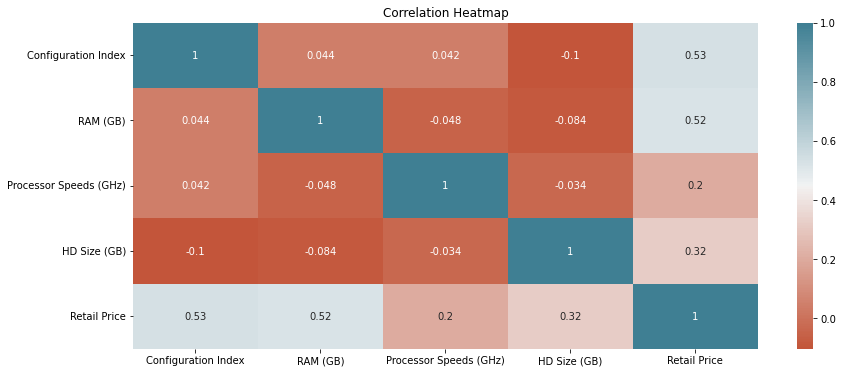

In [12]:
# Create heat map
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 6))
# utilize heatmap function. annot is annotation parameter. cmap represents the color pallette
sns.heatmap(corr, annot = True, cmap = sns.diverging_palette(20,220, n = 200))
plt.title('Correlation Heatmap')

In [13]:
# Divide the data into attributes and labels. X var contains all the attributes/features
# Y variable contains the target variable

# get_dummies method replaces Y/N with 0 and 1
# drop_first = True to mitigate effects of mutlicollinearity
x = pd.get_dummies(sales[['Configuration Index', 'RAM (GB)', 'Processor Speeds (GHz)', 
                         'Integrated Wireless', 'HD Size (GB)',
                         'Bundled Applications']], drop_first = True)
# create target variable
y = sales[['Retail Price']]

In [14]:
x

,Configuration Index,RAM (GB),Processor Speeds (GHz),HD Size (GB),Integrated Wireless_Yes,Bundled Applications_Yes
0,290,1,1.5,40,1,0
1,208,2,1.5,300,0,0
2,292,1,1.5,80,1,0
3,342,2,1.5,120,1,0
4,304,1,1.5,300,0,0
...,...,...,...,...,...,...
25644,479,1,2.4,300,0,1
25645,589,1,1.5,120,0,1
25646,731,1,1.5,80,0,1
25647,375,2,2.4,300,1,1


In [15]:
# Split data into training set and test set. Use 80% of data as the training set and 20% as test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
x_train.shape

(20519, 6)

In [16]:
# Train a linear regression model on the training set and estimate the coefficients
from sklearn.linear_model import LinearRegression
sales_regressor = LinearRegression()
sales_regressor.fit(x_train,y_train)
coeff_df= pd.DataFrame(sales_regressor.coef_, columns = x.columns)
# Display coefficient values for each attribute
coeff_df

# Processor Speeds and RAM have the highest correlation with retail price

,Configuration Index,RAM (GB),Processor Speeds (GHz),HD Size (GB),Integrated Wireless_Yes,Bundled Applications_Yes
0,0.173125,34.974064,38.247655,0.304455,15.538897,35.992358


In [17]:
# Statsmodels fits a line passing through the origin, it doesn't fit an intercept.
# Hence, you need to use the command 'add_constant' method
# Statsmodels however provide a convenience function called add_constant that adds a constant column 
# to input data set

import statsmodels.api as sm
x_train2 = sm.add_constant(x_train)
est = sm.OLS(y_train, x_train2)
est2 = est.fit()
print(est2.summary())

# Reference Adjusted R-Squared for regression results. Corelation coefficient also shown
# p value cut off is 0.05. Below this, results are significant

                            OLS Regression Results                            
Dep. Variable:           Retail Price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                 1.731e+04
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:52:54   Log-Likelihood:                -97410.
No. Observations:               20519   AIC:                         1.948e+05
Df Residuals:                   20512   BIC:                         1.949e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [18]:
# Evaluate the linear regression model
# Make predictions on training set and test set
y_train_pred = sales_regressor.predict(x_train)
y_test_pred = sales_regressor.predict(x_test)

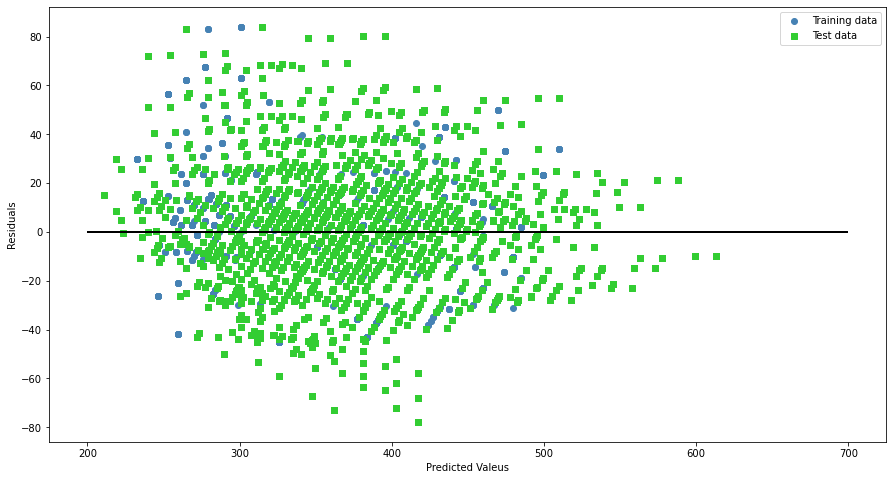

In [20]:
plt.figure(figsize = (15,8))
# Create residual training/test set scatter plt
# pred - actual value is measure of residuals
plt.scatter(y_train_pred, y_train_pred-y_train, c = 'steelblue', marker = 'o', label = 'Training data')
plt.scatter(y_test_pred, y_test_pred-y_test, color = 'limegreen', marker = 's', label = 'Test data')
plt.xlabel('Predicted Valeus')
plt.ylabel('Residuals')
# Create legend
plt.legend(loc = 'upper right')
# lw indicates the line width
plt.hlines(y = 0, xmin = 200, xmax = 700, color = 'black', lw = 2)
plt.show()
# in a perfect prediction the residuals should be as close to 0 as possible
# Outliers are the points with large deviations from the center line

In [22]:
# We can use 3 evaluation metrics to evaluate model performance
# This includes Mean squared error, Mean absolute error, Root mean squared error
# MSE is the mean of the squared errors
# MAE is the mean of the aboslute value of the errors
# RMSE is the square root of the mean of the squared errors
# Similar values between test and prediction set is good
from sklearn import metrics
import numpy as np
print('Mean Absolute Error on Test Data:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Absolute Error on Training Data:', metrics.mean_absolute_error(y_train, y_train_pred))

print('Mean Squared Error on Test Data:', metrics.mean_squared_error(y_test,y_test_pred))
print('Mean Squared Error on Training Data:', metrics.mean_squared_error(y_train,y_train_pred))

print('Root Mean Squared Error on Test Data:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Root Mean Squared Error on Training Data:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))


Mean Absolute Error on Test Data: 21.59110673795884
Mean Absolute Error on Training Data: 21.760198848831337
Mean Squared Error on Test Data: 768.2924424521232
Mean Squared Error on Training Data: 777.9861978009388
Root Mean Squared Error on Test Data: 27.718088722928268
Root Mean Squared Error on Training Data: 27.8924039444602


In [23]:
# Calculate r2 values
# Simlar values indicate r2 values are equal between training and test sets
from sklearn.metrics import r2_score
r_sq_test = r2_score(y_test, y_test_pred)
r_sq_train = r2_score(y_train, y_train_pred)
print('R squared on test set:', r_sq_test)
print('R squared on training set:', r_sq_train)

R squared on test set: 0.8323889325785557
R squared on training set: 0.8350651328238885
